<a href="https://colab.research.google.com/github/Janhavi1225-tq/biofouling-detection/blob/main/biofouling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()  # upload your YOLOv9 dataset .zip


Saving bio-foul.v4i.yolov8.zip to bio-foul.v4i.yolov8.zip


{'bio-foul.v4i.yolov8.zip': b'PK\x03\x04\x14\x03\x00\x00\x08\x00\x12\x92+[\xe5\xd8\xda\xfdx\x00\x00\x00\x89\x00\x00\x00\x12\x00\x00\x00README.dataset.txt5\xcc=\x0f\x820\x10\x80\xe1\xfd~\xc5%\xce\xfd"]\xec\xe0 \xab\x83qs\xa4p\xe8%\xd03-\xc5\xf0\xef\xc5D\x93w}\xde\x03F\x165J\x9d\xf0\x84\x8dm\xbc\xb2{\x0e\x9d\r\xcew3<\x97\xe5U\x8215\xf1J\xb9\x90\xce\x12e\x9c\xe4\xad{\x99\xcdn\xbf\x94\xd3C\x1d%\xd5\xcd\xfcg\x00\xd7,+\x0f4`\xdc\xb0\xc3\xdbOa-\x94\xe1\xc2=\xa5B\x01\xdb\x16\xcfw\xf4\xda\x02|\x00PK\x03\x04\x14\x03\x00\x00\x08\x00\x12\x92+[\xdb^\xdd\xb2\x84\x02\x00\x00\xe1\x04\x00\x00\x13\x00\x00\x00README.roboflow.txt}T\xd1N\xdb0\x14}\xcfW\xdc\x97M\x80\x9a6a\x14\x8dJ{\xd8&\x98&\r1\x01\x9a\xb6G\xc7\xb9m<\x1c\xdb\xb3\x9d\x16\xf8\xfa\x1d\xa7i\x802\xadj\xd4\xc4>>\xf7\xdcsO\x9aU\xca\xe6K\xdbi\xcai}B\xc7\xc5\xf1I^\xe0[RY,\xca\x13\xd1f\x1f\xfe\xfb\xc9\xb2\xdbF\x05\xaaE\x14\x81#mD \xbew\xd6G\xaei\xad\x04y[\xd9\xa5\xb6\x9b\xa9\xb4-YC7\xec"\xb7\x15{*\xcbI*7\'\x11\xe9tQ\x9e\xd2\xf7K\xfary\x9be\xd7\xc3\x1

In [ ]:
import zipfile

with zipfile.ZipFile("bio-foul.v4i.yolov8.zip", 'r') as zip_ref:
    zip_ref.extractall("biofoul_dataset")


In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.9 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

# Load YOLOv8
model = YOLO("yolov8s.pt")

# Train
results = model.train(
    data="biofoul_dataset/data.yaml",
    epochs=20,
    imgsz=640
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=biofoul_dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=Fals

In [ ]:
results = model.predict(
    source="biofoul_dataset/test/images",  # all test images
    save=True,       # save images with boxes
    save_txt=True,   # save coordinates even if no boxes drawn
    project="biofoul_results",  # new folder
    name="all_predictions",
    exist_ok=True
)



image 1/2 /content/biofoul_dataset/test/images/P1010139_JPG.rf.929f102d0b1ef3d5e9a3764b63571548.jpg: 640x640 2 lightly-fouleds, 13.6ms
image 2/2 /content/biofoul_dataset/test/images/P1010141_JPG.rf.9d98cf520120bb02d685e350c797ce96.jpg: 640x640 3 densly-fouleds, 1 lightly-fouled, 13.6ms
Speed: 2.3ms preprocess, 13.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/biofoul_results/all_predictions
2 labels saved to /content/biofoul_results/all_predictions/labels


['P1010139_JPG.rf.929f102d0b1ef3d5e9a3764b63571548.jpg', 'P1010141_JPG.rf.9d98cf520120bb02d685e350c797ce96.jpg', 'labels']


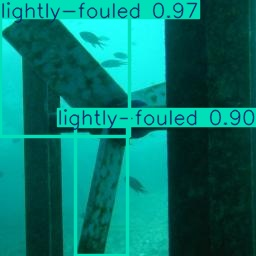

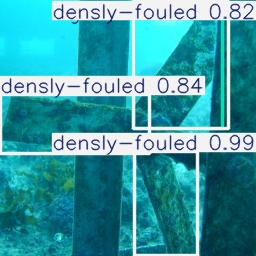

In [ ]:
from IPython.display import Image, display
import os

# Path where predictions are saved
folder = "/content/biofoul_results/all_predictions"

# List files
print(os.listdir(folder))

# Display all images (jpg/png)
for img_file in os.listdir(folder):
    if img_file.endswith((".jpg", ".png")):  # only images
        display(Image(filename=os.path.join(folder, img_file)))
